### Breast cancer diagnostic model using Neural Networks

I am using the breast cancer dataset from kaggle. I am trying to do the classification if its breast cancer or not breast cancer from the attributes.
1)ID number,2)Diagnosis (M = malignant, B = benign)
3-32)<br>

Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>

With this, I am trying to predict the output of malignant and benignant.

In [1]:
# Import necessary libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Load the breast cancer dataset
data = pd.read_csv("./data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Drop unnecessary columns
data.drop(columns=["id","Unnamed: 32"],inplace=True)

# Map the diagnosis column to numerical values
data["diagnosis"] = data["diagnosis"].map({"M":0,"B":1})

In [6]:
# Separate features and target
features = data.drop(columns=["diagnosis"])
target = data["diagnosis"]

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [9]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaledFeatures = min_max_scaler.fit_transform(features)

# Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(scaledFeatures,target,test_size=0.3,random_state=42)

In [10]:
X_train

array([[0.31989209, 0.27730808, 0.30633681, ..., 0.20683849, 0.15474078,
        0.09904237],
       [0.30238061, 0.22590463, 0.29237786, ..., 0.30852234, 0.09520993,
        0.13931523],
       [0.36485399, 0.14440311, 0.37613157, ..., 0.38075601, 0.24876799,
        0.24294897],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, ..., 0.11453608, 0.17602996,
        0.04040404],
       [0.33125089, 0.33513696, 0.32706793, ..., 0.62783505, 0.31815494,
        0.33097206],
       [0.24605992, 0.36557322, 0.23101375, ..., 0.25536082, 0.22255076,
        0.090122  ]])

In [11]:
# Define the input shape
inputShape = len(X_train[0])

inputShape

30

In [12]:
from keras import regularizers
model = Sequential()
model.add(layers.Dense(64, input_dim=inputShape, activation="relu",kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid')) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3041 (11.88 KB)
Trainable params: 3041 (11.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=150, verbose=1)

Epoch 1/150
10/10 [==============================] - 3s 51ms/step - loss: 3.0763 - accuracy: 0.6164 - val_loss: 2.9438 - val_accuracy: 0.6875
Epoch 2/150
10/10 [==============================] - 0s 12ms/step - loss: 2.8639 - accuracy: 0.6667 - val_loss: 2.7675 - val_accuracy: 0.8250
Epoch 3/150
10/10 [==============================] - 0s 10ms/step - loss: 2.7063 - accuracy: 0.7013 - val_loss: 2.5993 - val_accuracy: 0.8500
Epoch 4/150
10/10 [==============================] - 0s 10ms/step - loss: 2.5309 - accuracy: 0.7642 - val_loss: 2.4319 - val_accuracy: 0.8375
Epoch 5/150
10/10 [==============================] - 0s 12ms/step - loss: 2.3663 - accuracy: 0.7516 - val_loss: 2.2671 - val_accuracy: 0.8500
Epoch 6/150
10/10 [==============================] - 0s 11ms/step - loss: 2.2079 - accuracy: 0.8302 - val_loss: 2.1082 - val_accuracy: 0.8500
Epoch 7/150
10/10 [==============================] - 0s 12ms/step - loss: 2.0521 - accuracy: 0.8145 - val_loss: 1.9533 - val_accuracy: 0.8375
Epoch 

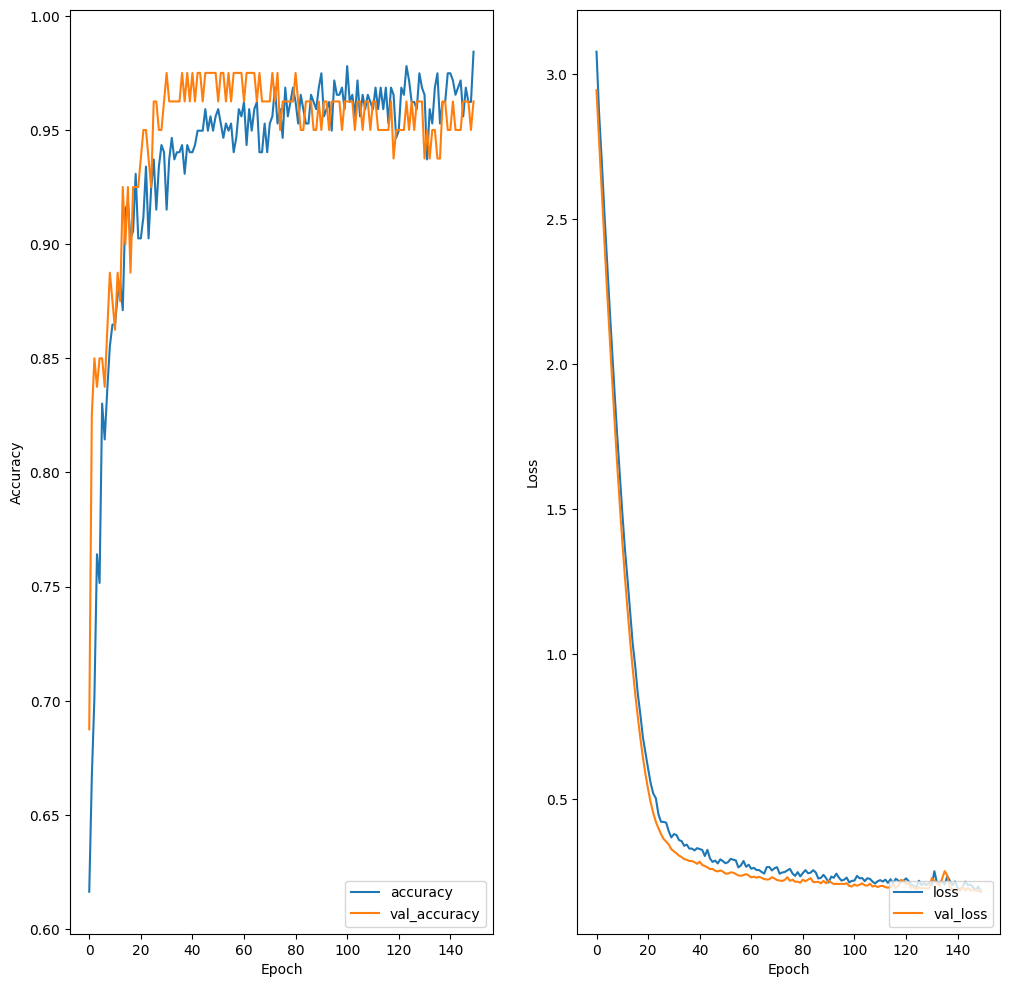

In [14]:
# Plot accuracy and loss from history.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Make predictions on the test set
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]

# Calculate and print the 
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,rounded)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,rounded)
print(cm)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,rounded))

6/6 [==============================] - 0s 2ms/step
Accuracy: 97.08%
[[ 61   2]
 [  3 105]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

